In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [73]:
data = pd.read_csv('data_for_neha.csv')
data.head()

,location,reproduction_rate,total_tests_per_thousand,tests_units,population_density,median_age,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,distance
0,Austria,0.81,428.293,2,106.749,44.4,45436.686,145.183,6.35,28.4,30.9,7.37,81.54,0.908,4.861432
1,Belgium,1.05,603.372,2,375.564,41.8,42658.576,114.898,4.29,25.1,31.4,5.64,81.63,0.916,3.231901
2,Czechia,1.35,359.331,2,137.176,43.3,32605.906,227.485,6.82,30.5,38.3,6.63,79.38,0.888,4.291106
3,France,1.02,450.333,0,122.578,42.0,38605.671,86.060,4.77,30.1,35.6,5.98,82.66,0.901,3.132560
4,Greece,0.83,271.056,1,83.479,45.3,24574.382,175.695,4.55,35.3,52.0,4.21,82.24,0.870,2.791574


<AxesSubplot:>

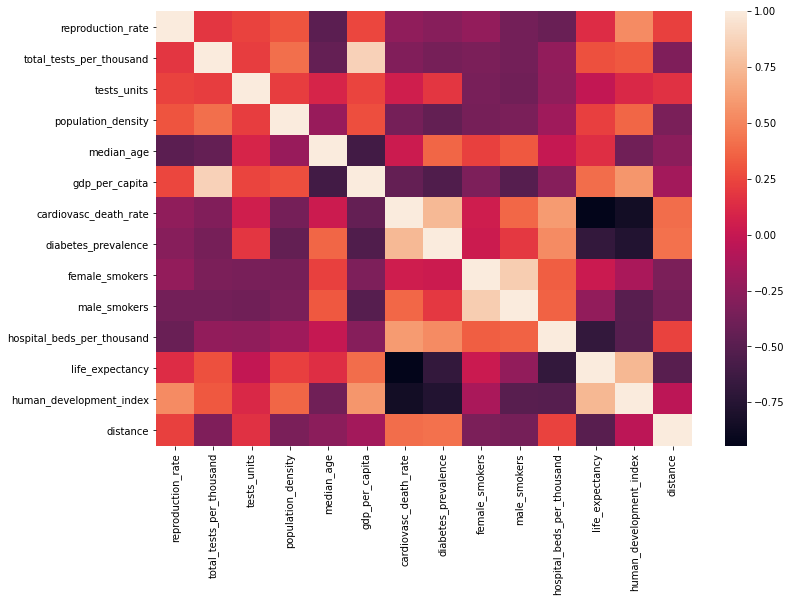

In [74]:
corr = data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr)

In [75]:
man = pd.read_csv('manufacture.csv')
man = man.replace(':', '')
man['Value'] = pd.to_numeric(man['Value'])
man.head()

,TIME,GEO,INDIC_BT,NACE_R2,S_ADJ,UNIT,Value,Flag and Footnotes
0,2015M01,Belgium,Volume index of production,MIG - capital goods,Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",82.8,NaN
1,2015M01,Belgium,Volume index of production,MIG - consumer goods,Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",94.3,NaN
2,2015M01,Belgium,Volume index of production,Manufacturing,Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",93.9,NaN
3,2015M01,Bulgaria,Volume index of production,MIG - capital goods,Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",82.6,NaN
4,2015M01,Bulgaria,Volume index of production,MIG - consumer goods,Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",87.6,NaN


In [76]:
data['Manufacturing before COVID'] = data['location'].apply(lambda x: man[(man['GEO'] == x) 
                                                                          & (man['NACE_R2'] == 'Manufacturing') 
                                                                          & (man['TIME'] <= '2019')]['Value'].sum()
                                                            / len(man[(man['GEO'] == x) 
                                                                          & (man['NACE_R2'] == 'Manufacturing') 
                                                                          & (man['TIME'] <= '2019')]['Value']))
data['Manufacturing during COVID'] = data['location'].apply(lambda x: man[(man['GEO'] == x) 
                                                                          & (man['NACE_R2'] == 'Manufacturing') 
                                                                          & (man['TIME'] >= '2020')]['Value'].sum()
                                                            / len(man[(man['GEO'] == x) 
                                                                          & (man['NACE_R2'] == 'Manufacturing') 
                                                                          & (man['TIME'] >= '2020')]['Value']))
data['Manufacturing'] = data['location'].apply(lambda x: man[(man['GEO'] == x) 
                                                                          & (man['NACE_R2'] == 'Manufacturing')]['Value'].sum()
                                                            / len(man[(man['GEO'] == x) 
                                                                          & (man['NACE_R2'] == 'Manufacturing')]['Value']))

data['Manufacturing Change'] = data['Manufacturing during COVID'] - data['Manufacturing before COVID']

data = data[~(data['Manufacturing Change'] == 0)]

data

,location,reproduction_rate,total_tests_per_thousand,tests_units,population_density,median_age,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,distance,Manufacturing before COVID,Manufacturing during COVID,Manufacturing,Manufacturing Change
0,Austria,0.81,428.293,2,106.749,44.4,45436.686,145.183,6.35,28.4,30.9,7.370,81.54,0.908,4.861432,105.583333,94.13,105.144286,-11.453333
1,Belgium,1.05,603.372,2,375.564,41.8,42658.576,114.898,4.29,25.1,31.4,5.640,81.63,0.916,3.231901,104.208333,107.74,106.011429,3.531667
2,Czechia,1.35,359.331,2,137.176,43.3,32605.906,227.485,6.82,30.5,38.3,6.630,79.38,0.888,4.291106,107.606250,105.04,108.500000,-2.566250
3,France,1.02,450.333,0,122.578,42.0,38605.671,86.060,4.77,30.1,35.6,5.980,82.66,0.901,3.132560,101.768750,91.13,100.632857,-10.638750
4,Greece,0.83,271.056,1,83.479,45.3,24574.382,175.695,4.55,35.3,52.0,4.210,82.24,0.870,2.791574,104.685417,109.75,106.344286,5.064583
5,Hungary,0.85,235.037,2,108.043,43.4,26777.561,278.296,7.55,26.8,34.8,7.020,76.88,0.838,4.196179,104.325000,107.51,106.782857,3.185000
7,Italy,0.90,445.343,2,205.859,47.9,35220.084,113.151,4.78,19.8,27.8,3.180,83.51,0.880,2.970482,103.268750,91.08,101.892857,-12.188750
8,Luxembourg,1.05,2661.802,2,231.447,39.7,94277.965,128.275,4.42,20.9,26.0,4.510,82.25,0.904,3.160665,101.475000,79.58,98.305714,-21.895000
9,Poland,0.93,186.158,0,124.027,41.8,27216.445,227.331,5.91,23.3,33.1,6.620,78.73,0.865,4.892629,108.508333,122.08,112.948571,13.571667
10,Romania,0.92,251.452,2,85.129,43.0,23313.199,370.946,9.74,22.9,37.1,6.892,76.05,0.811,4.700669,109.197917,103.50,109.581429,-5.697917


0.6435663637843471


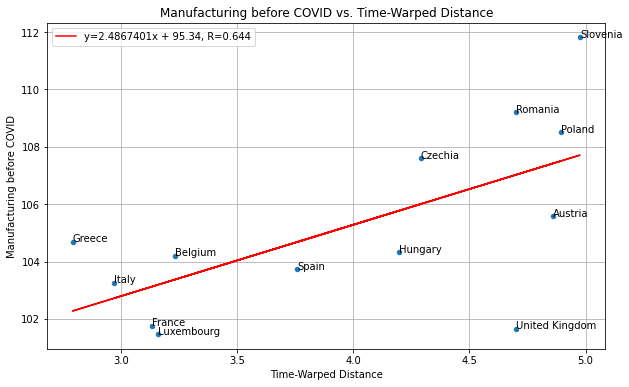

In [77]:
fig, ax = plt.subplots()
df = data
x = 'distance'
y = 'Manufacturing before COVID'
df.plot(x, y, kind='scatter', ax=ax, figsize=(10,6))
df_by_state = df.set_index('location')
for k, v in df_by_state[[x, y]].iterrows():
    ax.annotate(k, v)

z = np.polyfit(df[x], df[y], 1)
p = np.poly1d(z)
corr, _ = pearsonr(df[x],df[y])
print(corr)
plt.plot(df[x],p(df[x]),"r-", 
         label='y=' + str(round(z[0], 7)) + 'x + ' + str(round(z[1], 2)) + ', R=' + str(round(corr, 3)))
plt.xlabel('Time-Warped Distance')
# plt.ylabel('Difference in Calculated and Reported Case Count')
plt.title('Manufacturing before COVID vs. Time-Warped Distance')
plt.grid(True)
plt.legend()

In [85]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(4)
yhat = lof.fit_predict(df[[x, y]])

In [87]:
df['Distance from LinReg'] = df.apply(lambda a: abs(z[0]*a[x] + z[1] - a[y]), axis=1)
df

,location,reproduction_rate,total_tests_per_thousand,tests_units,population_density,median_age,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,distance,Manufacturing before COVID,Manufacturing during COVID,Manufacturing,Manufacturing Change,Distance from LinReg
0,Austria,0.81,428.293,2,106.749,44.4,45436.686,145.183,6.35,28.4,30.9,7.370,81.54,0.908,4.861432,105.583333,94.13,105.144286,-11.453333,1.840992
1,Belgium,1.05,603.372,2,375.564,41.8,42658.576,114.898,4.29,25.1,31.4,5.640,81.63,0.916,3.231901,104.208333,107.74,106.011429,3.531667,0.836227
2,Czechia,1.35,359.331,2,137.176,43.3,32605.906,227.485,6.82,30.5,38.3,6.630,79.38,0.888,4.291106,107.606250,105.04,108.500000,-2.566250,1.600178
3,France,1.02,450.333,0,122.578,42.0,38605.671,86.060,4.77,30.1,35.6,5.980,82.66,0.901,3.132560,101.768750,91.13,100.632857,-10.638750,1.356321
4,Greece,0.83,271.056,1,83.479,45.3,24574.382,175.695,4.55,35.3,52.0,4.210,82.24,0.870,2.791574,104.685417,109.75,106.344286,5.064583,2.408292
5,Hungary,0.85,235.037,2,108.043,43.4,26777.561,278.296,7.55,26.8,34.8,7.020,76.88,0.838,4.196179,104.325000,107.51,106.782857,3.185000,1.445014
7,Italy,0.90,445.343,2,205.859,47.9,35220.084,113.151,4.78,19.8,27.8,3.180,83.51,0.880,2.970482,103.268750,91.08,101.892857,-12.188750,0.546726
8,Luxembourg,1.05,2661.802,2,231.447,39.7,94277.965,128.275,4.42,20.9,26.0,4.510,82.25,0.904,3.160665,101.475000,79.58,98.305714,-21.895000,1.719960
9,Poland,0.93,186.158,0,124.027,41.8,27216.445,227.331,5.91,23.3,33.1,6.620,78.73,0.865,4.892629,108.508333,122.08,112.948571,13.571667,1.006429
10,Romania,0.92,251.452,2,85.129,43.0,23313.199,370.946,9.74,22.9,37.1,6.892,76.05,0.811,4.700669,109.197917,103.50,109.581429,-5.697917,2.173367
